In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u

In [2]:
filename='/data/SuperWASP/1SWASP J144508.70+050514.4.csv'

In [3]:
times, fluxes, sigmas = np.loadtxt(
    filename,
    dtype={
        'names': ('time', 'FLUX2', 'FLUX2_ERR'),
        'formats': ('f4', 'f4', 'f4'),
    },
    unpack=True,
    delimiter=',',
    usecols=(0,2,3),
    skiprows=1
)

mags = 15.0 - 2.5 * np.log10(fluxes)
mag_errs = 1.08574 * sigmas


In [4]:
# build model in phoebe
logger = phoebe.logger()

phases = phoebe.linspace(0,1,201)

b = phoebe.default_contact_binary()

b['period@binary'] = 10.98385 * u.hour

b.add_dataset(phoebe.parameters.dataset.lc, times=times, fluxes=mags, sigmas=mag_errs, dataset='lc01')
b.add_dataset(phoebe.parameters.dataset.rv, compute_phases=phases, dataset='rv01')
b.add_dataset(phoebe.parameters.dataset.orb, compute_phases=phases, dataset='orb01')
b.add_dataset(phoebe.parameters.dataset.mesh, compute_phases=phases, dataset='mesh01')

b.flip_constraint('compute_phases', solve_for='compute_times')


<ConstraintParameter: {compute_times@lc01@dataset} = phases_to_times({compute_phases@lc01@dataset}, {period@binary@component}, {dpdt@binary@component}, {compute_phases_t0@lc01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component}) (solar units) => [] d>

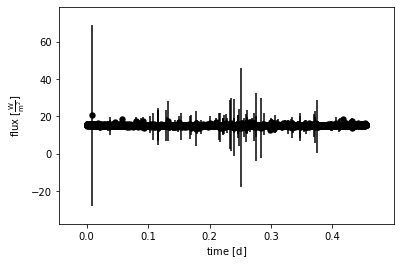

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 432x288 with 1 Axes>)

In [5]:
b['lc01'].plot(show=True)

In [ ]:
b.run_compute(model='default')

In [ ]:
b.plot(show=True)

In [ ]:
fig = b['mesh01@model'].plot(show=True)

In [ ]:
afig, mplfig = b['orb@default'].plot(x='phases', time=0.5, uncover=True, show=True)

mplfig.show()

In [ ]:
afig, mplfig = b.plot(kind='mesh', time=0.2, fc='teffs', ec='none', show=True)